In [181]:
#COURSERA-Covid-19 Data Visulization using Python
#Importing the Libraries-
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
print('modules are imported')

modules are imported


In [182]:
#Load the Dataset
#https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv
dataset_url='https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'

In [184]:
#Read The Dataset
df=pd.read_csv(dataset_url)

In [185]:
#Check the Dataset
df.head(5)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [186]:
df.tail(5)
#This Dataset is updated daily so there will be data from 22nd Of Jan ,2020 to the date u r running the code.

,Date,Country,Confirmed,Recovered,Deaths
70267,2021-01-17,Zimbabwe,27203,16512,713
70268,2021-01-18,Zimbabwe,27892,17372,773
70269,2021-01-19,Zimbabwe,28675,18110,825
70270,2021-01-20,Zimbabwe,29408,19253,879
70271,2021-01-21,Zimbabwe,30047,19569,917


In [187]:
df.shape

(70272, 5)

In [188]:
#TASK 2-we wish to see the Global spread of covid
# so we will see how many confirmed cases are there in each country, for that create a dataframe in which confirmed cases are above 0
df=df[df.Confirmed>0]


In [189]:
df.head(5)

,Date,Country,Confirmed,Recovered,Deaths
33,2020-02-24,Afghanistan,1,0,0
34,2020-02-25,Afghanistan,1,0,0
35,2020-02-26,Afghanistan,1,0,0
36,2020-02-27,Afghanistan,1,0,0
37,2020-02-28,Afghanistan,1,0,0


In [190]:
df.shape

(60808, 5)

In [191]:
df[df.Country=='Italy']

,Date,Country,Confirmed,Recovered,Deaths
31119,2020-01-31,Italy,2,0,0
31120,2020-02-01,Italy,2,0,0
31121,2020-02-02,Italy,2,0,0
31122,2020-02-03,Italy,2,0,0
31123,2020-02-04,Italy,2,0,0
...,...,...,...,...,...
31471,2021-01-17,Italy,2381277,1745726,82177
31472,2021-01-18,Italy,2390102,1760489,82554
31473,2021-01-19,Italy,2400598,1781917,83157
31474,2021-01-20,Italy,2414166,1806932,83681


In [192]:
df.sort_values('Date',inplace=True)
#helps plot the dates in increasing order.

In [193]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [14]:
#QUESTIONS
#second thing is that how do i move the title to the middle
#post the query on Stack overflow.

In [201]:
# Lets see how covid numbers have changed in all the countries each day begining from day 1 of covid to today.
fig=px.choropleth(df,locations='Country',locationmode='country names',color='Confirmed',animation_frame='Date',title="Global Spread of Covid")
fig.show()


In [202]:
# lets see Deaths in covid-19
fig=px.choropleth(df,locations='Country',locationmode='country names',color='Deaths',animation_frame='Date')

In [203]:
fig.update_layout(title_text='Global Death in Covid-19')
fig.show()

In [ ]:
#TASK-3
#Lets visualize how intensive the covid-19 transmission has been in each country
# We need a measure of it which we have taken the maximum no of infected cases in 24 hours.This can be calculated
# by subtracting each days data to the earlier day for each country and then taking the maximum for each country and plotting a graph

In [300]:
df_china=df[df.Country=='China']

In [301]:
df_china.head()

,Date,Country,Confirmed,Recovered,Deaths
13176,2020-01-22,China,548,28,17
13177,2020-01-23,China,643,30,18
13178,2020-01-24,China,920,36,26
13179,2020-01-25,China,1406,39,42
13180,2020-01-26,China,2075,49,56


In [302]:
# Now lets select the number of columns we need
df_china=df_china[['Date','Confirmed']]

In [303]:
df_china.head(5)

,Date,Confirmed
13176,2020-01-22,548
13177,2020-01-23,643
13178,2020-01-24,920
13179,2020-01-25,1406
13180,2020-01-26,2075


In [305]:
# Now lets calculate the first derivation of confirmed column which will be the infection rate per day our KPI here
df_china['Infection rate']=df_china['Confirmed'].diff()
df_china.head()


,Date,Confirmed,Infection rate
13176,2020-01-22,548,NaN
13177,2020-01-23,643,95.0
13178,2020-01-24,920,277.0
13179,2020-01-25,1406,486.0
13180,2020-01-26,2075,669.0


In [314]:
df_china

,Date,Confirmed,Infection rate
13176,2020-01-22,548,NaN
13177,2020-01-23,643,95.0
13178,2020-01-24,920,277.0
13179,2020-01-25,1406,486.0
13180,2020-01-26,2075,669.0
...,...,...,...
13537,2021-01-17,97939,164.0
13538,2021-01-18,98164,225.0
13539,2021-01-19,98323,159.0
13540,2021-01-20,98544,221.0


In [316]:
# Now lets find out this infection rate for all the countries
countries=list(df['Country'].unique())

In [317]:
df_china['Infection rate'].max()

15136.0

In [318]:
# lets calculate this max no for all countries-
countries=list(df['Country'].unique())

In [323]:
countries

['Korea, South',
 'Thailand',
 'Japan',
 'US',
 'Taiwan*',
 'China',
 'Vietnam',
 'Singapore',
 'France',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Sri Lanka',
 'Germany',
 'Cambodia',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'United Kingdom',
 'Italy',
 'Russia',
 'Spain',
 'Sweden',
 'Belgium',
 'Diamond Princess',
 'Egypt',
 'Iran',
 'Israel',
 'Lebanon',
 'Chile',
 'Kuwait',
 'Oman',
 'Bahrain',
 'Afghanistan',
 'Iraq',
 'Switzerland',
 'Algeria',
 'Austria',
 'Pakistan',
 'Croatia',
 'Brazil',
 'North Macedonia',
 'Norway',
 'Greece',
 'Georgia',
 'Romania',
 'Estonia',
 'Denmark',
 'Netherlands',
 'San Marino',
 'Lithuania',
 'Iceland',
 'New Zealand',
 'Mexico',
 'Nigeria',
 'Belarus',
 'Qatar',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Armenia',
 'Dominican Republic',
 'Ecuador',
 'Azerbaijan',
 'Czechia',
 'Latvia',
 'Senegal',
 'Andorra',
 'Portugal',
 'Indonesia',
 'Morocco',
 'Saudi Arabia',
 'Jordan',
 'Ukraine',
 'Argentina',
 'Poland',
 'Hung

In [324]:
max_infection_rates=[]
for c in countries:
  MIR=df[df.Country==c].Confirmed.diff().max()
  max_infection_rates.append(MIR)

In [325]:
print(max_infection_rates)

[1237.0, 745.0, 7863.0, 298031.0, 27.0, 15136.0, 50.0, 1426.0, 106091.0, 5743.0, 4029.0, 16141.0, 716.0, 887.0, 49044.0, 31.0, 840.0, 3529.0, 6725.0, 97894.0, 68192.0, 40902.0, 29499.0, 84287.0, 32485.0, 23921.0, 99.0, 1774.0, 14051.0, 10213.0, 6154.0, 13990.0, 1073.0, 2685.0, 841.0, 1485.0, 5055.0, 21926.0, 1133.0, 9586.0, 12073.0, 4620.0, 87843.0, 1402.0, 1680.0, 3316.0, 5450.0, 10269.0, 1084.0, 4508.0, 13072.0, 76.0, 4551.0, 106.0, 89.0, 28115.0, 1964.0, 1975.0, 2355.0, 8227.0, 1967.0, 40.0, 2476.0, 2370.0, 11536.0, 4451.0, 17773.0, 1861.0, 342.0, 299.0, 14647.0, 14224.0, 6195.0, 4919.0, 7933.0, 16585.0, 18326.0, 32733.0, 6819.0, 62.0, 5752.0, 2516.0, 21980.0, 1953.0, 3354.0, 76.0, 3115.0, 57.0, 7999.0, 21078.0, 7.0, 2324.0, 6315.0, 21358.0, 245.0, 215.0, 4828.0, 1268.0, 1766.0, 4019.0, 907.0, 26.0, 879.0, 5186.0, 315.0, 87.0, 476.0, 430.0, 823225.0, 244.0, 2655.0, 1386.0, 133.0, 650.0, 278.0, 39.0, 1554.0, 1829.0, 1514.0, 2414.0, 18757.0, 139.0, 346.0, 1513.0, 57.0, 312.0, 217.0, 2

In [326]:
df_MIR=pd.DataFrame()
df_MIR['Country']=countries
df_MIR['maximum_infectionRate']=max_infection_rates

In [328]:
df_MIR

,Country,maximum_infectionRate
0,"Korea, South",1237.0
1,Thailand,745.0
2,Japan,7863.0
3,US,298031.0
4,Taiwan*,27.0
...,...,...
187,Solomon Islands,5.0
188,Marshall Islands,3.0
189,Vanuatu,0.0
190,Samoa,1.0


In [329]:
px.bar(df_MIR,x='Country',y='maximum_infectionRate',color='Country',title='Global Maximum Infection Rate',log_y=True)

In [ ]:
#putting log_y=True changed the scale in y axis. Basically we do this when the values of eg y here. some are very high and some are very low.

In [232]:
#TASK 4+5-
#calculate the Deaths rate in Italy
#Infection Rate and Death rate both are calculoated as first derivated of the respective columns
# This exercise is to see how both death rates and Infection rates are before and after lockdown
df_italy.head()

,Date,Country,Confirmed,Recovered,Deaths,Infection rate
31119,2020-01-31,Italy,2,0,0,NaN
31120,2020-02-01,Italy,2,0,0,0.0
31121,2020-02-02,Italy,2,0,0,0.0
31122,2020-02-03,Italy,2,0,0,0.0
31123,2020-02-04,Italy,2,0,0,0.0


In [234]:
df_italy['Deaths Rate']=df_italy.Deaths.diff()

In [236]:
df_italy.head()

,Date,Country,Confirmed,Recovered,Deaths,Infection rate,Deaths Rate
31119,2020-01-31,Italy,2,0,0,NaN,NaN
31120,2020-02-01,Italy,2,0,0,0.0,0.0
31121,2020-02-02,Italy,2,0,0,0.0,0.0
31122,2020-02-03,Italy,2,0,0,0.0,0.0
31123,2020-02-04,Italy,2,0,0,0.0,0.0


In [240]:
#Now df_italy has 2 columsn additional to df,namely Deaths are and Infection rate
#plotting both of them with date to cpmare the deaths and infection rates
df_italy

,Date,Country,Confirmed,Recovered,Deaths,Infection rate,Deaths Rate
31119,2020-01-31,Italy,2,0,0,NaN,NaN
31120,2020-02-01,Italy,2,0,0,0.0,0.0
31121,2020-02-02,Italy,2,0,0,0.0,0.0
31122,2020-02-03,Italy,2,0,0,0.0,0.0
31123,2020-02-04,Italy,2,0,0,0.0,0.0
...,...,...,...,...,...,...,...
31471,2021-01-17,Italy,2381277,1745726,82177,12544.0,377.0
31472,2021-01-18,Italy,2390102,1760489,82554,8825.0,377.0
31473,2021-01-19,Italy,2400598,1781917,83157,10496.0,603.0
31474,2021-01-20,Italy,2414166,1806932,83681,13568.0,524.0


In [255]:
infection_ratesss=df_italy['Infection rate']
Deaths_ratesss=df_italy['Deaths Rate']
datesss=df_italy['Date']

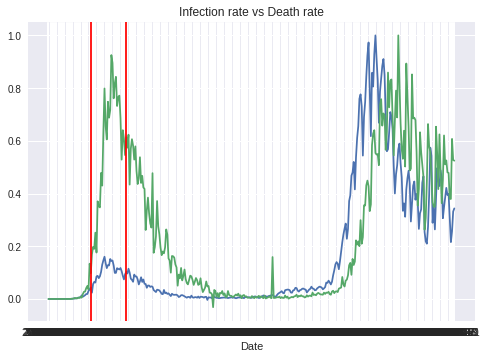

In [299]:
plt.plot(datesss,infection_ratesss)
plt.plot(datesss,Deaths_ratesss)
plt.title('Infection rate vs Death rate')
plt.axvline(x ='2020-03-09', color = 'r')
plt.axvline(x ='2020-04-09', color = 'r')
plt.xlabel('Date')
plt.tight_layout
plt.show()


In [253]:
#both the variables are highly differenton scale so to compare we need to naormalize them
# Normalzation means we need to bring all the values between -1 to +1 so so to do this we need to divide all the values by max values in the column
df_italy['Infection rate']=df_italy['Infection rate']/df_italy['Infection rate'].max()

In [254]:
#Do the same for deaths rate
df_italy['Deaths Rate']=df_italy['Deaths Rate']/df_italy['Deaths Rate'].max()

In [ ]:
The above graph shows both the Death rates and infection rates have dropped aftre lockdown.So the lockdown was succesfulin Italy
